<a href="https://colab.research.google.com/github/engineeringmix/ConsoleApp1/blob/master/Predicting_Insurance_Premiums_using_Random_Forest_Regression_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Import Necessary Libraries**
Import the required libraries for data manipulation, visualization, and machine learning.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# **2.Load** **the** **Dataset**

Load the insurance premiums dataset from the provided URL.


In [ ]:
url = "https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Insurance%20Premium.csv"
df = pd.read_csv(url)

# **3.Explore** **the** **Data**

Understand the structure of the dataset, check for missing values, and get an overview of the features.

In [ ]:
print(df.head())

   ID  Age  Gender     BMI  Children Smoker Region  Premium
0   1   19  female  27.900         0    yes  south    16885
1   2   18    male  33.770         1     no   east     1726
2   3   28    male  33.000         3     no   east     4449
3   4   33    male  22.705         0     no   west    21984
4   5   32    male  28.880         0     no   west     3867


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1338 non-null   int64  
 1   Age       1338 non-null   int64  
 2   Gender    1338 non-null   object 
 3   BMI       1338 non-null   float64
 4   Children  1338 non-null   int64  
 5   Smoker    1338 non-null   object 
 6   Region    1338 non-null   object 
 7   Premium   1338 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB
None


In [ ]:
print(df.describe())

                ID          Age          BMI     Children       Premium
count  1338.000000  1338.000000  1338.000000  1338.000000   1338.000000
mean    669.500000    39.207025    30.663397     1.094918  13270.414798
std     386.391641    14.049960     6.098187     1.205493  12110.012882
min       1.000000    18.000000    15.960000     0.000000   1122.000000
25%     335.250000    27.000000    26.296250     0.000000   4740.000000
50%     669.500000    39.000000    30.400000     1.000000   9382.000000
75%    1003.750000    51.000000    34.693750     2.000000  16640.000000
max    1338.000000    64.000000    53.130000     5.000000  63770.000000


# **4.Data Visualization**

Visualize relationships between different features and the target variable (insurance premiums).


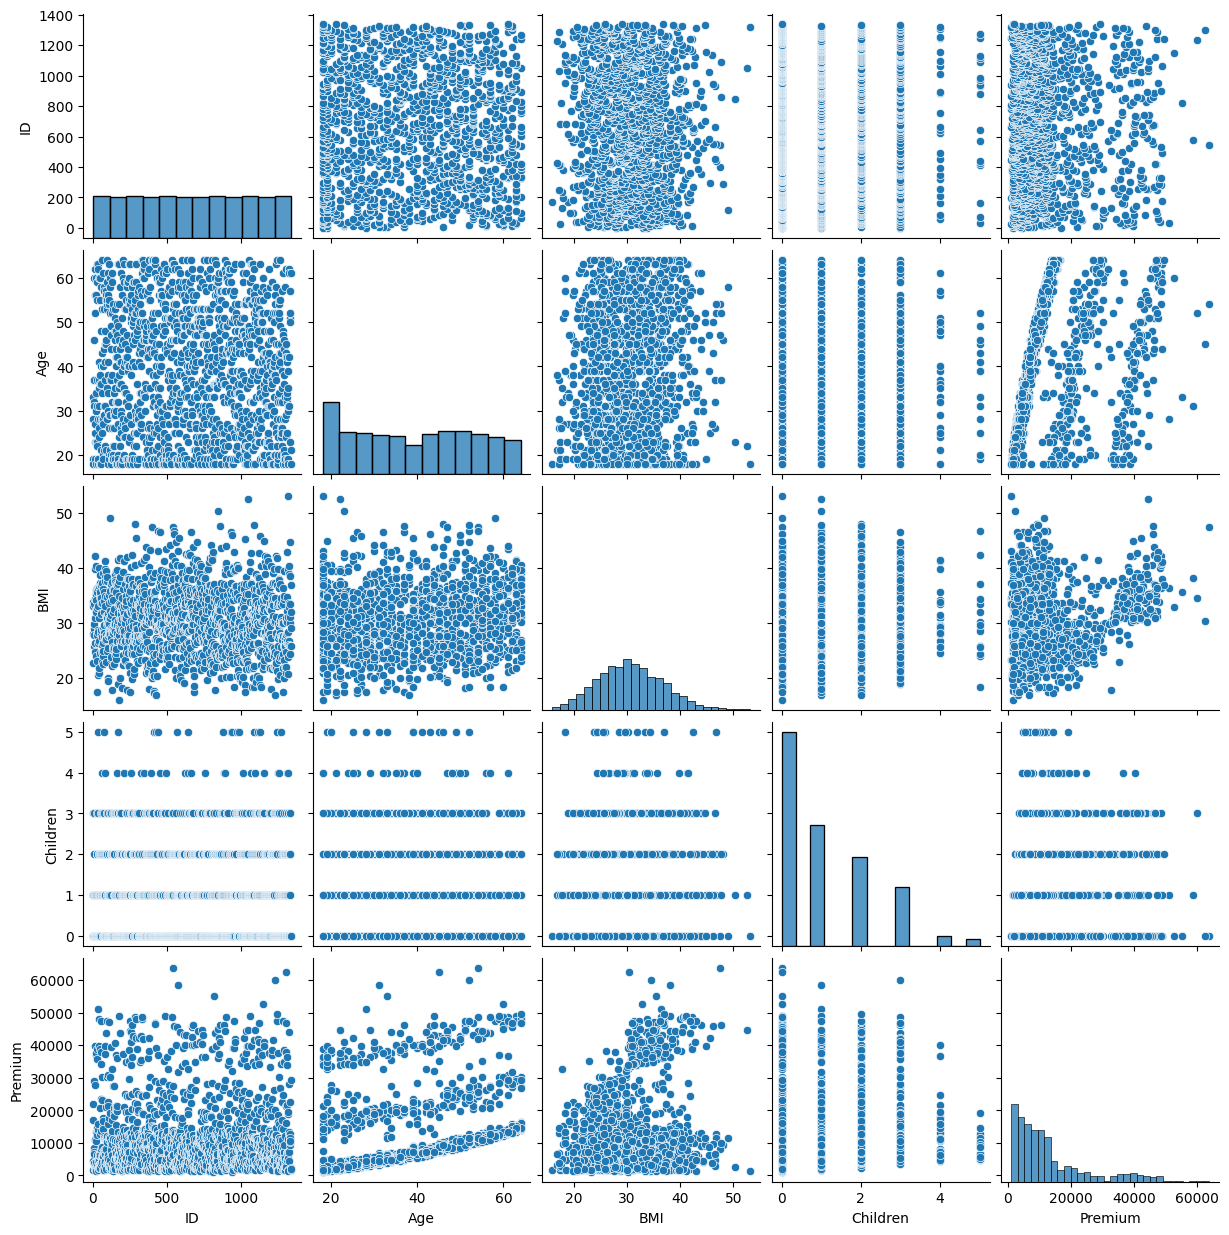

In [ ]:
# Pairplot to visualize relationships between different features and premiums
sns.pairplot(df)
plt.show()

#**5.Prepare the Data**
Preprocess the data as needed. This might involve handling missing values, encoding categorical variables, and scaling numerical features.


<ipython-input-13-3ccfa5c8d201>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Smoker'] = le.fit_transform(subset_df['Smoker'])


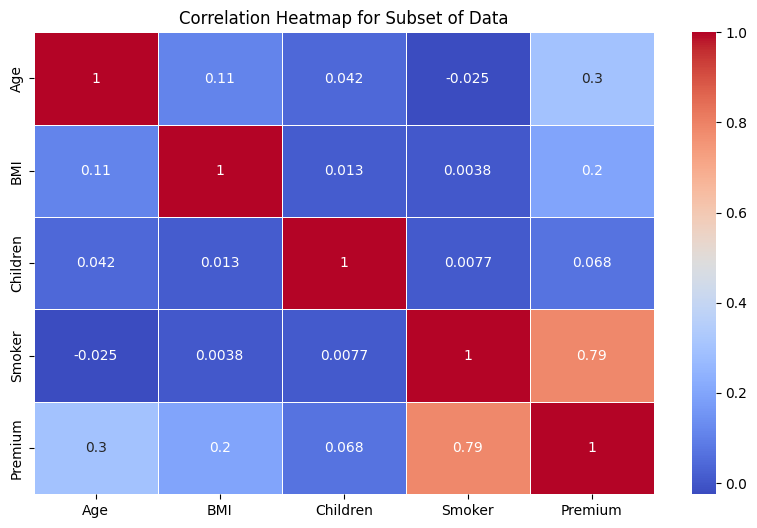

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define subset_df using the relevant columns from the original dataframe
subset_df = df[['Age', 'BMI', 'Children', 'Smoker', 'Premium']]

# Encode 'Smoker' column into numerical values
le = LabelEncoder()
subset_df['Smoker'] = le.fit_transform(subset_df['Smoker'])

# Create correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(subset_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Subset of Data')
plt.show()

#**6.Train the Model**

Train a Random Forest Regression model using the training data.


In [ ]:
# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Premium'])
y = df['Premium']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# One-hot encode categorical variables
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

In [ ]:
# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_encoded, y_train)

RandomForestRegressor(random_state=42)

#**7.Evaluate the Model**

Evaluate the performance of the model on the testing data using Mean Absolute Error (MAE).

In [ ]:
# One-hot encode categorical variables in the test set
X_test_encoded = pd.get_dummies(X_test)

In [ ]:
# Ensure that the columns in X_test_encoded match those in X_train_encoded
missing_cols = set(X_train_encoded.columns) - set(X_test_encoded.columns)
for col in missing_cols:
    X_test_encoded[col] = 0

In [ ]:
# Reorder columns to match the order in X_train_encoded
X_test_encoded = X_test_encoded[X_train_encoded.columns]

In [ ]:
# Predict using the model
y_pred = model.predict(X_test_encoded)

In [ ]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 2759.328656716418


#**8.Visualization of Results**

Visualize the results to understand the performance of the model and the distribution of residuals.

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

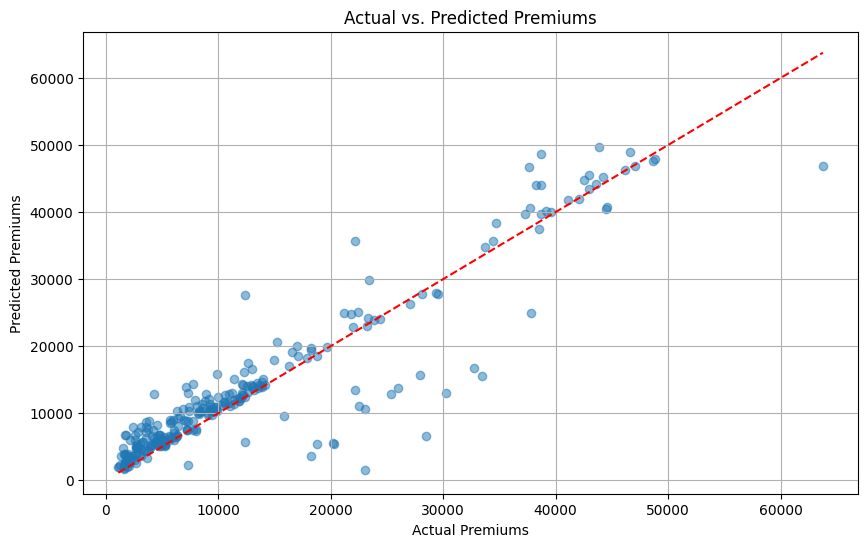

In [ ]:
# Plot actual premiums vs. predicted premiums
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel("Actual Premiums")
plt.ylabel("Predicted Premiums")
plt.title("Actual vs. Predicted Premiums")
plt.grid(True)
plt.show()

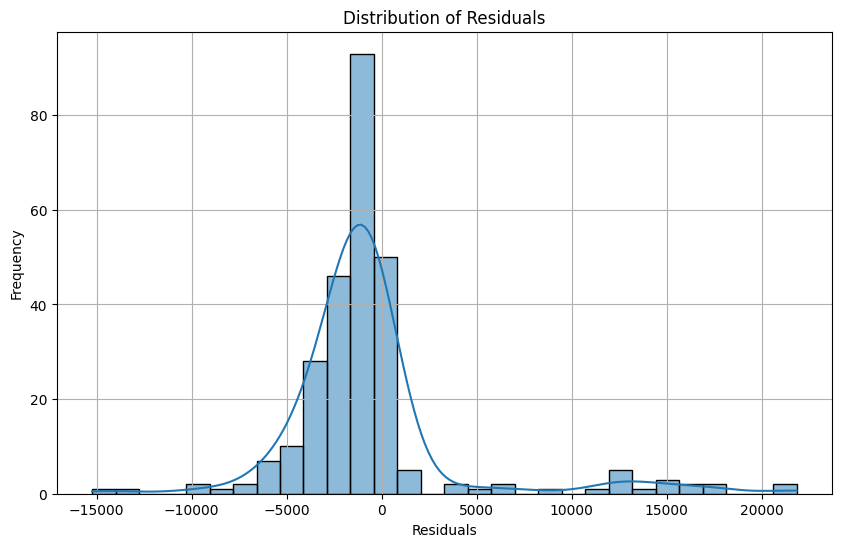

In [ ]:
# Plot distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.grid(True)
plt.show()

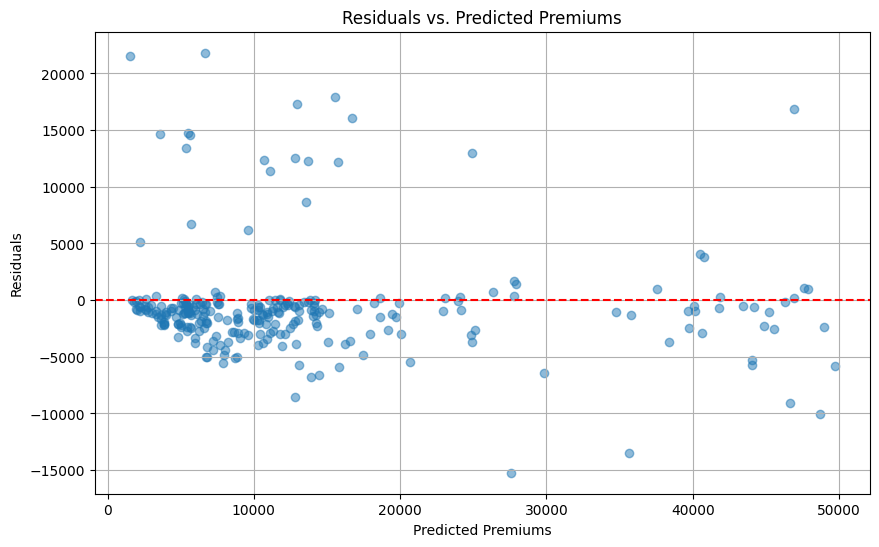

In [ ]:
# Plot residuals vs. predicted premiums
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Premiums")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Premiums")
plt.grid(True)
plt.show()